In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [6]:
import requests

# Import the API key.
from config import weather_api_key

In [7]:
 #Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | acapulco
Processing Record 2 of Set 1 | morgan city
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | plouzane
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | saint-michel-des-saints
Processing Record 9 of Set 1 | kalundborg
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | pangnirtung
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | tripoli
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | coahuayana
Processing Record 17 of Set 1 | shibarghan
City not found. Skipping...
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | avera
Processing Record 21 of Set 1 | ust-kamchatsk
City not

Processing Record 34 of Set 4 | utiroa
City not found. Skipping...
Processing Record 35 of Set 4 | butaritari
Processing Record 36 of Set 4 | hachinohe
Processing Record 37 of Set 4 | makakilo city
Processing Record 38 of Set 4 | necochea
Processing Record 39 of Set 4 | vazante
Processing Record 40 of Set 4 | alyangula
Processing Record 41 of Set 4 | zhemchuzhnyy
City not found. Skipping...
Processing Record 42 of Set 4 | arona
Processing Record 43 of Set 4 | nikolskoye
Processing Record 44 of Set 4 | isangel
Processing Record 45 of Set 4 | morondava
Processing Record 46 of Set 4 | severo-kurilsk
Processing Record 47 of Set 4 | cabedelo
Processing Record 48 of Set 4 | atar
Processing Record 49 of Set 4 | nizhniy odes
Processing Record 50 of Set 4 | baruun-urt
Processing Record 1 of Set 5 | lompoc
Processing Record 2 of Set 5 | sapele
Processing Record 3 of Set 5 | mogadouro
Processing Record 4 of Set 5 | lac du bonnet
Processing Record 5 of Set 5 | carnarvon
Processing Record 6 of Set 

City not found. Skipping...
Processing Record 23 of Set 8 | harrisonburg
Processing Record 24 of Set 8 | choya
Processing Record 25 of Set 8 | tuatapere
Processing Record 26 of Set 8 | great bend
Processing Record 27 of Set 8 | naberera
Processing Record 28 of Set 8 | yermakovskoye
Processing Record 29 of Set 8 | morant bay
Processing Record 30 of Set 8 | stornoway
Processing Record 31 of Set 8 | sorong
Processing Record 32 of Set 8 | general pico
Processing Record 33 of Set 8 | vanavara
Processing Record 34 of Set 8 | hamilton
Processing Record 35 of Set 8 | quelimane
Processing Record 36 of Set 8 | himora
City not found. Skipping...
Processing Record 37 of Set 8 | coquimbo
Processing Record 38 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 39 of Set 8 | ullapool
Processing Record 40 of Set 8 | bafq
Processing Record 41 of Set 8 | vila franca do campo
Processing Record 42 of Set 8 | trat
Processing Record 43 of Set 8 | kampong cham
Processing Record 44 of Set 8 | am

Processing Record 9 of Set 12 | saint-louis
Processing Record 10 of Set 12 | winnemucca
Processing Record 11 of Set 12 | hofn
Processing Record 12 of Set 12 | kieta
Processing Record 13 of Set 12 | kahului
Processing Record 14 of Set 12 | bin qirdan
Processing Record 15 of Set 12 | sukhothai
Processing Record 16 of Set 12 | einsiedeln
Processing Record 17 of Set 12 | affery
Processing Record 18 of Set 12 | stephenville
Processing Record 19 of Set 12 | dosso
Processing Record 20 of Set 12 | beira
Processing Record 21 of Set 12 | lae
Processing Record 22 of Set 12 | shestakovo
Processing Record 23 of Set 12 | port lincoln
Processing Record 24 of Set 12 | huilong
Processing Record 25 of Set 12 | hirado
Processing Record 26 of Set 12 | frontera
Processing Record 27 of Set 12 | camacha
Processing Record 28 of Set 12 | mehamn
Processing Record 29 of Set 12 | vaitape
Processing Record 30 of Set 12 | knysna
Processing Record 31 of Set 12 | tolga
Processing Record 32 of Set 12 | san roque
Proce

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Acapulco,16.8634,-99.8901,84.02,70,0,11.50,MX,2022-02-05 21:36:12
1,Morgan City,29.6994,-91.2068,51.80,46,0,6.91,US,2022-02-05 21:36:41
2,Hilo,19.7297,-155.0900,76.73,80,75,5.75,US,2022-02-05 21:36:42
3,Plouzane,48.3833,-4.6167,50.32,87,100,19.57,FR,2022-02-05 21:36:42
4,Barrow,71.2906,-156.7887,-16.58,69,40,14.97,US,2022-02-05 21:36:42
5,Busselton,-33.6500,115.3333,65.05,90,18,6.85,AU,2022-02-05 21:35:47
6,Ushuaia,-54.8000,-68.3000,55.06,71,40,23.02,AR,2022-02-05 21:36:43
7,Saint-Michel-Des-Saints,46.6834,-73.9159,-1.41,82,60,7.09,CA,2022-02-05 21:36:43
8,Kalundborg,55.6795,11.0886,40.33,95,100,33.17,DK,2022-02-05 21:36:44
9,Chuy,-33.6971,-53.4616,70.03,84,65,9.33,UY,2022-02-05 21:36:44


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Acapulco,MX,2022-02-05 21:36:12,16.8634,-99.8901,84.02,70,0,11.50
1,Morgan City,US,2022-02-05 21:36:41,29.6994,-91.2068,51.80,46,0,6.91
2,Hilo,US,2022-02-05 21:36:42,19.7297,-155.0900,76.73,80,75,5.75
3,Plouzane,FR,2022-02-05 21:36:42,48.3833,-4.6167,50.32,87,100,19.57
4,Barrow,US,2022-02-05 21:36:42,71.2906,-156.7887,-16.58,69,40,14.97
5,Busselton,AU,2022-02-05 21:35:47,-33.6500,115.3333,65.05,90,18,6.85
6,Ushuaia,AR,2022-02-05 21:36:43,-54.8000,-68.3000,55.06,71,40,23.02
7,Saint-Michel-Des-Saints,CA,2022-02-05 21:36:43,46.6834,-73.9159,-1.41,82,60,7.09
8,Kalundborg,DK,2022-02-05 21:36:44,55.6795,11.0886,40.33,95,100,33.17
9,Chuy,UY,2022-02-05 21:36:44,-33.6971,-53.4616,70.03,84,65,9.33


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

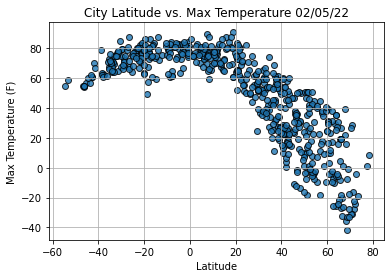

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

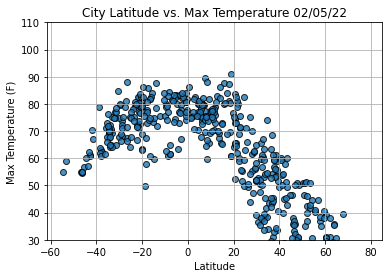

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim(30, 110)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

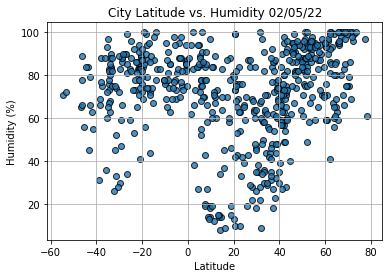

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

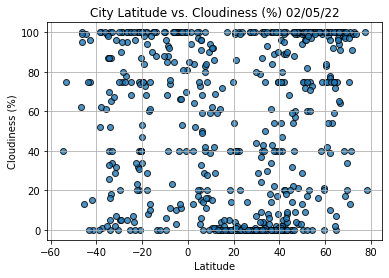

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

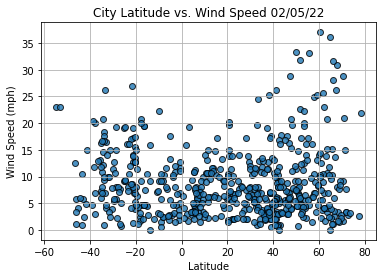

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()